# Volume 4: Finite Difference Method
    <Name>
    <Class>
    <Date>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy.sparse import diags

In [5]:
%matplotlib inline

# Problem 1

Let $u(x) = sin((x + \pi)^2 - 1)$. Use (1.3) - (1.6) to approximate $\frac{1}{2}
u'' − u'$ at the grid points where $a = 0$, $b = 1$, and $n = 10$. Graph the result.

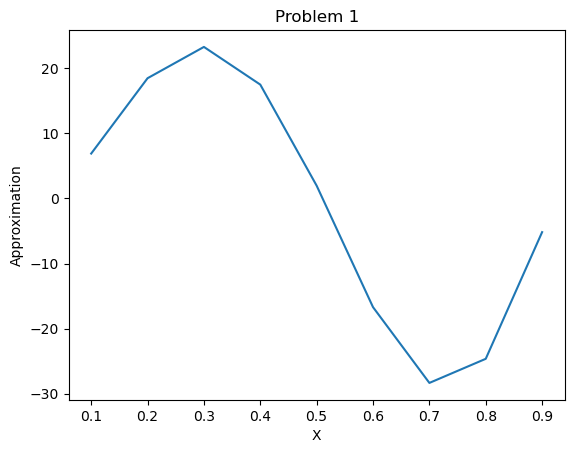

In [6]:
# Define u(x)
def u(x):
    return np.sin((x + np.pi)**2 -1)
    
    
# Set constants and linspace   
a = 0
b = 1
n = 10
h = (b-a)/n
X = np.linspace(a,b, n+1)


# Define diagonals for first matrix of u_prime
ones = [1 for i in range(n-1)]
negative_ones = [-1 for i in range(n-1)]
diagonals = [ones, negative_ones]
offsets = [1, -1]

# Build matrices of u_prime
A_matrix = diags(diagonals, offsets, shape = (n-1, n-1))
B_matrix = np.array([u(x) for x in X[1:-1]])
C_matrix = np.zeros(n-1)
C_matrix[0] = -u(X[0])/(h*2)
C_matrix[-1] = u(X[-1])/(h*2)

# Get u'
u_prime = (1/(2*h)) * A_matrix @ B_matrix + C_matrix


# Define diagonals for first matrix of u_double_prime
ones = [1 for i in range(n-1)]
negative_twos = [-2 for i in range(n-1)]
diagonals = [ones, negative_twos, ones]
offsets = [-1,0,1]

# Build matrices of u_double_prime
A2_matrix = diags(diagonals, offsets, shape = (n-1, n-1))
B2_matrix = B_matrix
C2_matrix = np.zeros(n-1)
C2_matrix[0] = u(X[0])/(h**2)
C2_matrix[-1] = u(X[-1])/(h**2)

# Get u''
u_double_prime = (1/(h**2)) * A2_matrix @ B2_matrix + C2_matrix

# Calculate and plot final result
result = (0.5) * u_double_prime - u_prime
plt.plot(X[1:-1], result)
plt.title('Problem 1')
plt.xlabel('X')
plt.ylabel('Approximation')
plt.show()














# Problem 2

Equation (1.7) is the singularly perturbed boundary value problem
\begin{align*}
	&{ } \varepsilon u''(x)-u(x)'= f(x), \quad x \in (0,1), \\
	&{ } u(0) = \alpha, \quad u(1) = \beta.
\end{align*}

Use equation (1.9) to solve the singularly perturbed BVP (1.7) on $[0,1]$ with $\varepsilon = 1/10, f(x) = -1, \alpha=1,$ and $\beta=3$ on a grid with $n=30$ subintervals. Graph the solution. This BVP is called singularly perturbed because of the location of the parameter $\varepsilon$. For $\varepsilon=0$ the ODE has a drastically different character - it then becomes first order, and can no longer support two boundary conditions.

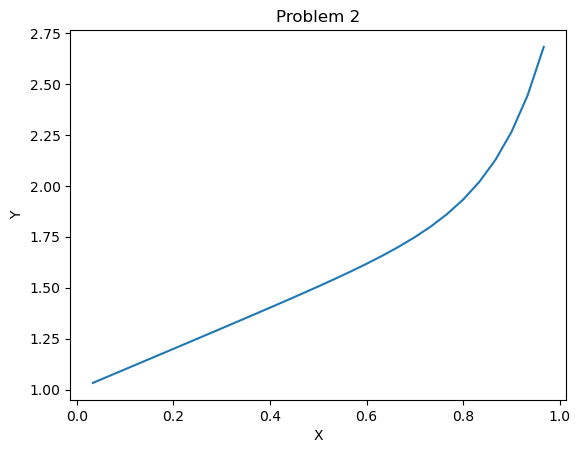

In [7]:
# Set constants and linspace   
alpha = 1
beta = 3
n = 30
h = 1/n
epsilon = 1/10
f = -1
X = np.linspace(0, 1, n+1)

# Define diagonals for first matrix 
main_diagonal = [-2 * epsilon for i in range(n-1)]
left_diagonal = [epsilon + h/2 for i in range(n-2)]
right_diagonal = [epsilon - h/2 for i in range(n-2)]
diagonals = [left_diagonal, main_diagonal, right_diagonal]
offsets = [-1,0,1]

# Build left matrix
left_matrix = (1/(h**2)) * (diags(diagonals, offsets, shape = (n-1, n-1)))

# Build right matrix
right_matrix = np.zeros(n-1) + f
right_matrix[0] -= alpha*(epsilon + h/2)/(h**2)
right_matrix[-1] -= beta*(epsilon - h/2)/(h**2)

# Solve for U
U = np.linalg.solve(left_matrix.toarray(), right_matrix)

# Plot data
plt.plot(X[1:-1], U)
plt.title('Problem 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()





# Problem 3

Implement a function `singular_bvp` to compute the finite difference solution to (1.7).
Using $n = 5 \times 2^0,5 \times 2^1, \dots ,5 \times 2^9$ subintervals, compute 10 approximate solutions.
Use these to visualize the $\mathcal{O}(h^2)$ convergence of the finite difference method from Problem 2 by producing a loglog plot of error against subinterval count; this will be similar to Figure 2, except with $\varepsilon=0.1$. 

To produce the plot, treat the approximation with $n = 5 \times 2^9$ subintervals as the "true solution", and measure the error for the other approximations against it. ote that, since the ratios of numbers of subintervals between approximations are multiples of 2, we can compute the $L_{\infty}$ error for the $n=5 \times 2^j$ approximation by using the `step` argument in the array slicing syntax:

    # best approximation; the vector has length 5*2^9+1
    sol_best = singular_bvp(eps,alpha,beta,f,5*(2**9))

    # approximation with 5*(2^j) intervals; the vector has length 5*2^j+1
    sol_approx = singular_bvp(eps,alpha,beta,f,5*(2**j))

    # approximation error; slicing results in a vector of length 5*2^j+1,
    #    which allows it to be compared
    error = np.max(np.abs(sol_approx - sol_best[::2**(9-j)]))


In [8]:
def singular_bvp(eps,alpha,beta,f,n):
    """
    Solves the singularly perturbed BVP (1.7) on the interval [0,1] using finite differences.
    
    Parameters:
        eps (float): the singular perturbation parameter of the BVP.
        alpha (float): the boundary value of u at x=0.
        beta (float): the boundary value of u at x=1.
        f (callable): the right-hand function of the BVP.
        n (int): the number of subintervals to use in the finite differences method.
        
    Returns:
        ((n+1,) ndarray): the approximated solution to the BVP, including the boundary points.
    """
    
    # Set constants and linspace   
    alpha = alpha
    beta = beta
    n = n
    h = 1/n
    epsilon = eps
    f = f
    X = np.linspace(0, 1, n+1)

    # Define diagonals for first matrix 
    main_diagonal = [-2 * epsilon for i in range(n-1)]
    left_diagonal = [epsilon + h/2 for i in range(n-2)]
    right_diagonal = [epsilon - h/2 for i in range(n-2)]
    diagonals = [left_diagonal, main_diagonal, right_diagonal]
    offsets = [-1,0,1]

    # Build left matrix
    left_matrix = (1/(h**2)) * (diags(diagonals, offsets, shape = (n-1, n-1)))
    
    # Build right matrix
    right_matrix = np.zeros(n-1) + f
    right_matrix[0] -= alpha*(epsilon + h/2)/(h**2)
    right_matrix[-1] -= beta*(epsilon - h/2)/(h**2)
    
    # Solve for U
    U = np.linalg.solve(left_matrix.toarray(), right_matrix)
    
    # Return approximated solution to the BVP, including the boundary points
    answer = np.array([alpha] + U.tolist() + [beta])
    return answer


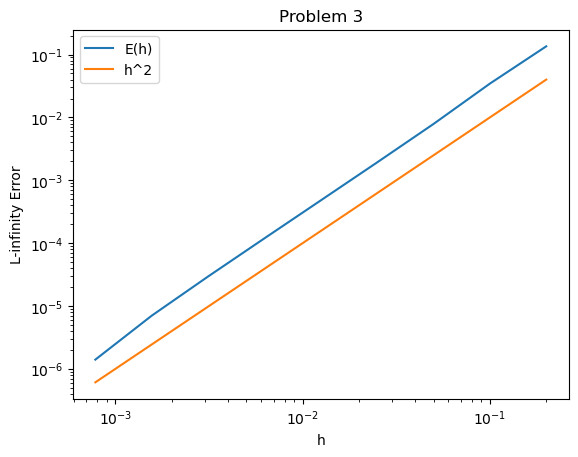

In [9]:
# Initialize empty lists
n_solutions = []
errors = []
H = []

# Set N and I
N = [5 * 2**i for i in range(0,9)]
I = [i for i in range(0,9)]

# Get best solution
sol_best = singular_bvp(0.1, 1, 3, -1, 5*(2**9))

# Create errors and H arrays
for i, n in zip(I,N):
    sol_approx = singular_bvp(0.1, 1, 3, -1, n)
    error = np.max(np.abs(sol_approx - sol_best[::2**(9-i)]))
    errors.append(error)
    h = 1/n
    H.append(h)
    
# Convet to numpy array
H = np.array(H)

# Plot data
plt.loglog(H, errors, label = 'E(h)')
plt.loglog(H, H**2, label = 'h^2')
plt.legend()
plt.xlabel('h')
plt.ylabel('L-infinity Error')
plt.title('Problem 3')
plt.show()
    



# Problem 4

Extend your finite difference code to the case of a general second order linear BVP with boundary conditions:

\begin{align*}
	&{ } a_1(x)y''(x) +a_2(x)y'(x)+ a_3(x) y(x) = f(x), \quad x \in (a,b),\\
	&{ } y(a) = \alpha, \quad y(b) = \beta.
\end{align*}

Use your code to solve the boundary value problem

\begin{align*}
	\varepsilon y''(x) - 4(\pi - x^2)y(x) = \cos x, \\
	y(0) = 0, \quad y(\pi/2) = 1,
\end{align*}

for $\varepsilon = 0.1$ on a grid with $n=30$ subintervals. Plot your solution.

In [48]:
def bvp(a,b,alpha,beta,a1,a2,a3,f,n):
    """
    Computes the solution to the BVP:
        
        a1(x)y'' + a2(x)y' + a3(x)y = f
        y(a) = α, y(b) = β
        
    using finite differences.
    
    Parameters:
        a, b (float): the left and right boundary points.
        alpha (float): the boundary value of y at x=a.
        beta (float): the boundary value of y at x=b.
        f (callable): the right-hand function of the BVP.
        a1, a2, a3 (callable): the coefficient functions of the BVP.
        n (int): the number of subintervals to use in the finite differences method.
        
    Returns:
        ((n+1,) ndarray): the approximated solution to the BVP, including the boundary points.
    """
    
    # Define different data values
    h = (b-a)/n
    X = np.linspace(a, b, n+1)
    X_needed = X[1:-1]
    x_0 = X_needed[0]
    x_f = X_needed[-1]
    
    
    # Define diagonals for first matrix
    main_diagonal = [-2 * a1(x) + (a3(x) * h**2) for x in X_needed]
    left_diagonal = [a1(x) - (a2(x)*(h/2)) for x in X_needed[1:]]
    right_diagonal = [a1(x) + (a2(x)*(h/2)) for x in X_needed[:-1]]
    diagonals = [left_diagonal, main_diagonal, right_diagonal]
    offsets = [-1,0,1]
    
    
    
    # Build left matrix
    left_matrix = (1/(h**2)) * (diags(diagonals, offsets, shape = 
                                      (n-1, n-1)))

    # Build right matrix
    right_matrix = np.array([f(x) for x in X_needed])
    right_matrix[0] -= alpha * ((a1(X_needed[0])) / (h ** 2) - a2(X_needed[0]) / (2 * h))
    right_matrix[-1] -= beta * ((a1(X_needed[-1])) / (h ** 2) + a2(X_needed[-1]) / (2 * h))

    # Solve for U
    U = np.linalg.solve(left_matrix.toarray(), right_matrix)
    
    # Return approximated solution to the BVP, including the 
    # boundary points
    answer = np.array([alpha] + U.tolist() + [beta])
    return answer
    

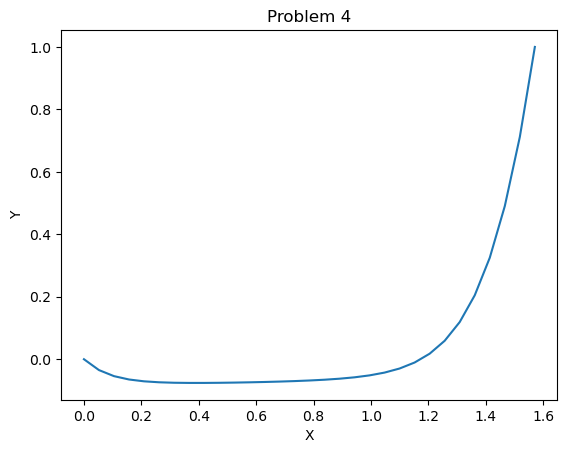

In [49]:
# Define coefficients and function
a1 = lambda x: 1/10
a2 = lambda x: 0
a3 = lambda x: -4 * (np.pi - x**2)
f = lambda x: np.cos(x)

# Define the linspace X
X = np.linspace(0, np.pi/2, 31)

# Solve bvp
sol = bvp(0, np.pi/2, 0, 1, a1,a2, a3, f, 30)

# Plot the data
plt.plot(X, sol)
plt.title('Problem 4')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Problem 5

Numerically solve the boundary value problem

\begin{align*}
	\varepsilon y''(x) + xy'(x) = -\varepsilon \pi^2 \cos(\pi x) - \pi x \sin(\pi x), \\
	y(-1) = -2, \quad y(1) = 0,
\end{align*}

for $\varepsilon = 0.1, 0.01,$ and $0.001$. Use a grid with $n=150$ subintervals. Plot your solutions.

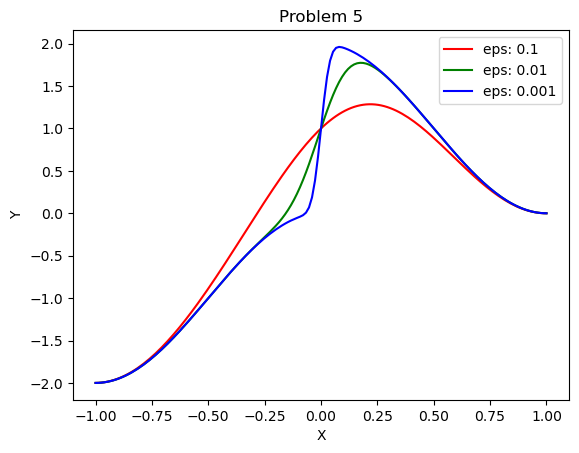

In [50]:
# Define epsilons and colors
eps_list = [0.1, 0.01, 0.001]
colors = ['red', 'green', 'blue']

# Loop through all tthe epsilons
for i, eps in enumerate(eps_list):

    # Define the coeffficients and the function
    a1 = lambda x: eps * np.ones_like(x)
    a2 = lambda x: x
    a3 = lambda x: np.zeros_like(x)
    f = lambda x: -eps * (np.pi**2) * np.cos(np.pi * x) - np.pi * x * np.sin(np.pi * x)
    
    # Define the linspace of X
    X = np.linspace(-1,1, 150 +1)
    
    # Solve the bvp
    sol = bvp(-1, 1, -2, 0, a1, a2, a3, f, 150)

    # Plot the data
    plt.plot(X, sol, label = f'eps: {eps}', color = colors[i])
    plt.title('Problem 5')
    plt.xlabel('X')
    plt.ylabel('Y')

# Show data
plt.legend()
plt.show()



# Problem 6

Numerically solve the boundary value problem

\begin{align*}
	(\varepsilon +x^2)y''(x) + 4xy'(x) + 2y(x) = 0, \\
	y(-1) = 1/(1+\varepsilon), \quad y(1) = 1/(1+\varepsilon),
\end{align*}

for $\epsilon = 0.05$ and $0.02$. Use a grid with $n=150$ subintervals. Plot your solutions.

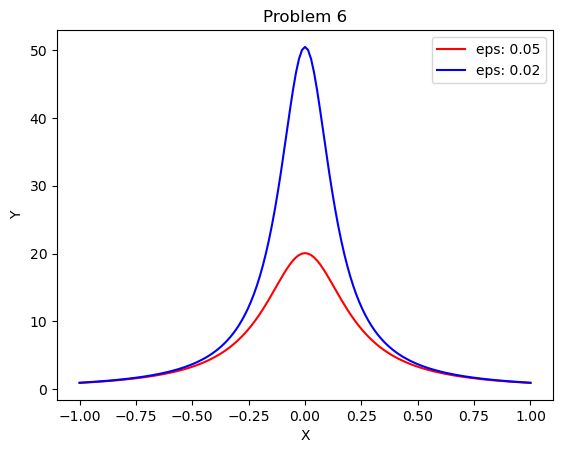

In [51]:
# Define epsilons and colors
eps_list = [0.05, 0.02]
colors = ['red', 'blue']

# Loop through all the epsilons
for i, eps in enumerate(eps_list):

    # Define the coefficients and the function
    a1 = lambda x: eps + x**2
    a2 = lambda x: 4*x
    a3 = lambda x: 2
    f = lambda x: 0
    
    # Define the X linspace and alpha and beta
    X = np.linspace(-1,1, 150 +1)
    alpha = 1/(1+eps)
    beta = 1/(1+eps)
    
    # Solve the bvp
    sol = bvp(-1, 1, alpha, beta, a1, a2, a3, f, 150)

    # Plot data
    plt.plot(X, sol, label = f'eps: {eps}', color = colors[i])
    plt.title('Problem 6')
    plt.xlabel('X')
    plt.ylabel('Y')

# Show data
plt.legend()
plt.show()